## Print "NEXUS" Exercise

Welcome to the first exercise, in which we will be printing and drawing on a wellplate using a dye. 

Before we begin, let's get familiarized with jupyter notebooks. 

In [1]:
## Jupyter notbook is built from "cells". Cells can contain plain text, or executable code

print("Hello there, I'm a cell that contains executable code")

## You can execute this cell by clicking on it and either pressing SHIFT+ENTER or the triangle at the top menu.

## TODO: try executing this cell.

Hello there, I'm a cell that contains executable code


### Step 1

Before we begin the exercise, let's execute the helper code in the cell below. 

In [2]:
from collections import namedtuple


class VisualWellPlate:
    """ A fake plate, which can be used to visualize pipetting results. """ 
    
    def __init__(self, num_rows, num_cols, well_size):
        self._wells = np.zeros(shape=(num_rows, num_cols), dtype=np.int32)
        xaxis = np.linspace(1, num_rows, num_rows)
        yaxis = np.linspace(1, num_cols, num_cols)
        x, y = np.meshgrid(xaxis, yaxis)
        self._well_pos = namedtuple('XY', 'x y')(x, y)
        self._well_size = well_size
        
    
    def well_pos(self):
        return self._well_pos
    
    def set_val(self, pos, val):
        x, y = pos
        self._wells[x-1, y-1] = val
    
    def well_vals(self):
        return self._wells
    
    def ysize(self):
        return self._wells.shape[1]
    
    def xsize(self):
        return self._wells.shape[0]
    
    def well_size(self):
        return self._well_size

def create_96_well_plate():
    return VisualWellPlate(num_rows=8, num_cols=12, well_size=480)

def create_384_well_plate():
    return VisualWellPlate(num_rows=16, num_cols=24, well_size=120)

def char_range(start, n): 
    return [chr(c) for c in range(ord(start), ord(start)+n)]

import numpy as np

def viz_put_dye(plate, well, volume):
    plate.set_val(well, volume)
    
print('Well done, helper code is successfully executed')

Well done, helper code is successfully executed


### Step 3

In this exercise we will be using OpenTron-2 robot and control it using python API. A guide on how to use it is here: 

For this exercise, we need only two functions: 

Since we will be transfering lots of liquids, lets write a function that will help us to do it. 

In [3]:
def put_dye(plate, well, volume, pipette=None, dye_container=None):
    """
    A function that transfers pre-defined volume of a dye from dye_container to a plate
    
    Parameters:
        plate - plate where to put the dye, its wells can be addressed
        well - well position, a tuple (row, column) 
        
        
    """
    #TODO: complete the code that will transfer dye from container to the plate

### Step 4
Now, using the function we just wrote, let's write another, that will print a word "NEXUS" on a 96-well-plate

In [4]:
def print_nexus(plate, put_dye): 
    """
    Using the method 'put_dye', prints the word "NEXUS" on a plate
    
    Parameters:
        plate - plate on which to print "NEXUS"
        put_dye - a function to put dye into a well, it's already pre-configured with a pipette and a dye_container, so can be called using put_dye(plate, well, volume)
    """
    put_dye(plate=plate, well=(5, 5), volume=50) # an example, which should put dye into the well (5, 5)
    
    #(TODO): change the code to print "NEXUS" on a plate. 
    # hint: first jump to step 5 without making any changes any changes, to visually see where the well (5, 5) is displayed on the visual plate. Then try different positions, e.g. (1, 10)
    
    

### Step 5

Before running our code on the robot, let's test our code to make sure its correct. To do that, execute the cell below.

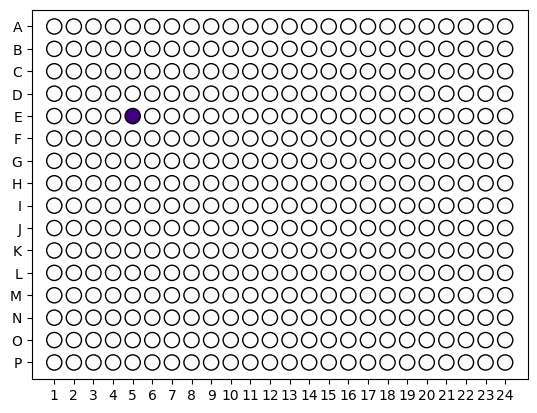

In [5]:
def show_plate(viz_plate):
    """ Displays a VisualWellPlate """
    import matplotlib.pyplot as plt
    plt.scatter(x=viz_plate.well_pos().y, y=viz_plate.well_pos().x,
                marker='o', facecolors='none', edgecolors='black', 
                s=viz_plate.well_size(), c=viz_plate.well_vals().T, cmap='Purples')
    plt.gca().invert_yaxis()
    plt.yticks(np.arange(1, viz_plate.xsize()+1), char_range('A', viz_plate.xsize()))
    plt.xticks(np.arange(1, viz_plate.ysize()+1))
    plt.show()    
    
    
viz_plate = create_384_well_plate()
print_nexus(viz_plate, viz_put_dye)
show_plate(viz_plate)

### Expected Result

Try to reproduce the drawing below: 

![test](nexus.png)